### Task 2: Quantitative Analysis of Stock Prices
This notebook performs EDA on stock price data, calculates technical indicators using TA-Lib, and prepares data for correlation analysis with news sentiment.


In [3]:
import sys
from pathlib import Path

# Add project root and src/ folder to Python path
project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

from fns_project.config import RAW_DIR, PROCESSED_DIR, DEFAULTS
from fns_project.data.loader import load_price_csv

sns.set_style('whitegrid')

In [17]:
# 2. Load stock price data
TICKER = "AMZN"  # Example ticker symbol
price_file = RAW_DIR / f"price/{TICKER}.csv"  # use RAW_DIR from config
price_df = load_price_csv(price_file, date_col="Date",
                          tz=DEFAULTS["market_tz"])

price_df.head(5)

2025-11-23 11:17:17,593 INFO Loaded prices: 3774 rows from D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\raw\price\AMZN.csv


,date,Close,High,Low,Open,Volume
0,2009-01-01 19:00:00-05:00,2.718,2.7265,2.5535,2.5675,145928000
1,2009-01-04 19:00:00-05:00,2.703,2.7870,2.6515,2.7865,190196000
2,2009-01-05 19:00:00-05:00,2.868,2.9110,2.6875,2.7275,221602000
3,2009-01-06 19:00:00-05:00,2.810,2.8475,2.7675,2.8145,158854000
4,2009-01-07 19:00:00-05:00,2.858,2.8660,2.7290,2.7495,131558000


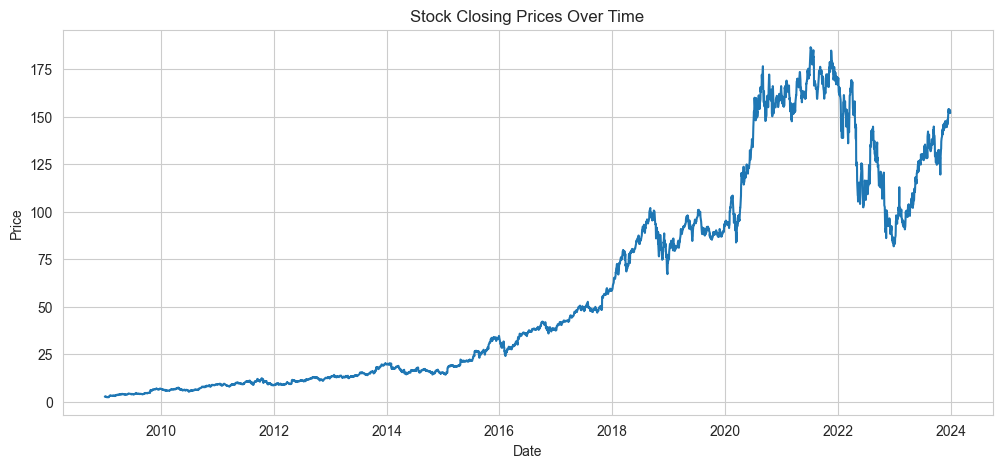

In [18]:
# 3. Basic EDA
price_df.describe()

# Plot closing prices
plt.figure(figsize=(12, 5))
plt.plot(price_df['date'], price_df['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

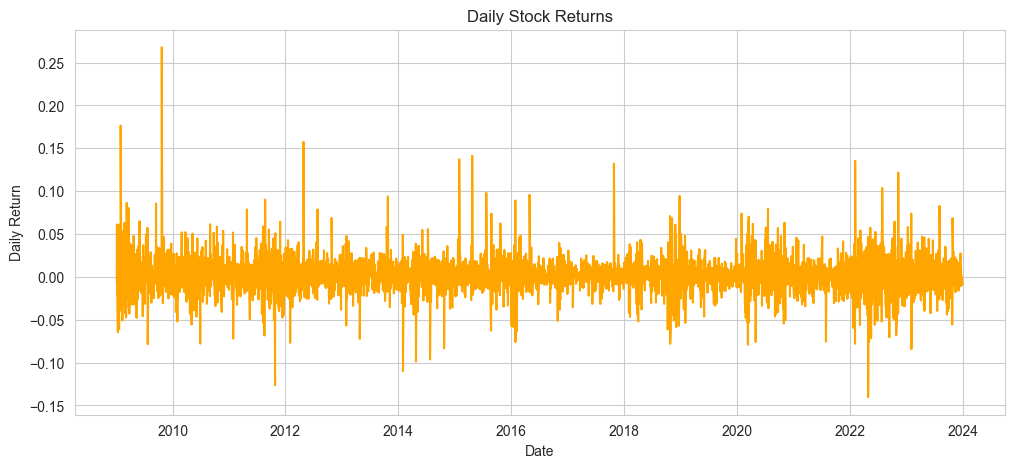

In [19]:
# 4. Daily returns
price_df['daily_return'] = price_df['Close'].pct_change()

plt.figure(figsize=(12, 5))
plt.plot(price_df['date'], price_df['daily_return'],
         label='Daily Return', color='orange')
plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

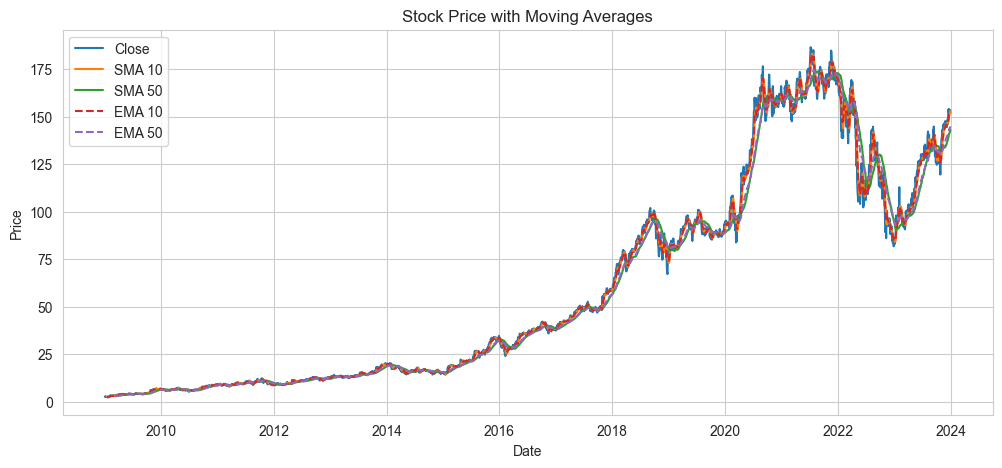

In [20]:
# 5. Moving Averages
price_df['SMA_10'] = talib.SMA(price_df['Close'], timeperiod=10)
price_df['SMA_50'] = talib.SMA(price_df['Close'], timeperiod=50)
price_df['EMA_10'] = talib.EMA(price_df['Close'], timeperiod=10)
price_df['EMA_50'] = talib.EMA(price_df['Close'], timeperiod=50)

plt.figure(figsize=(12, 5))
plt.plot(price_df['date'], price_df['Close'], label='Close')
plt.plot(price_df['date'], price_df['SMA_10'], label='SMA 10')
plt.plot(price_df['date'], price_df['SMA_50'], label='SMA 50')
plt.plot(price_df['date'], price_df['EMA_10'], label='EMA 10', linestyle='--')
plt.plot(price_df['date'], price_df['EMA_50'], label='EMA 50', linestyle='--')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

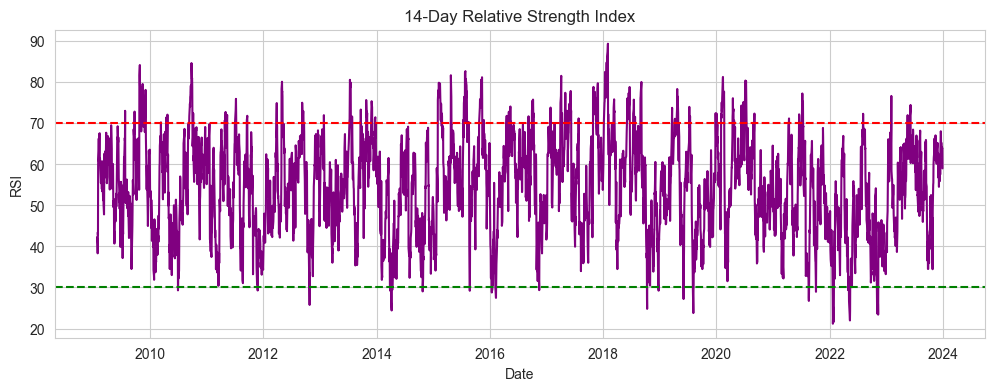

In [21]:
# 6. RSI
price_df['RSI_14'] = talib.RSI(price_df['Close'], timeperiod=14)

plt.figure(figsize=(12, 4))
plt.plot(price_df['date'], price_df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('14-Day Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

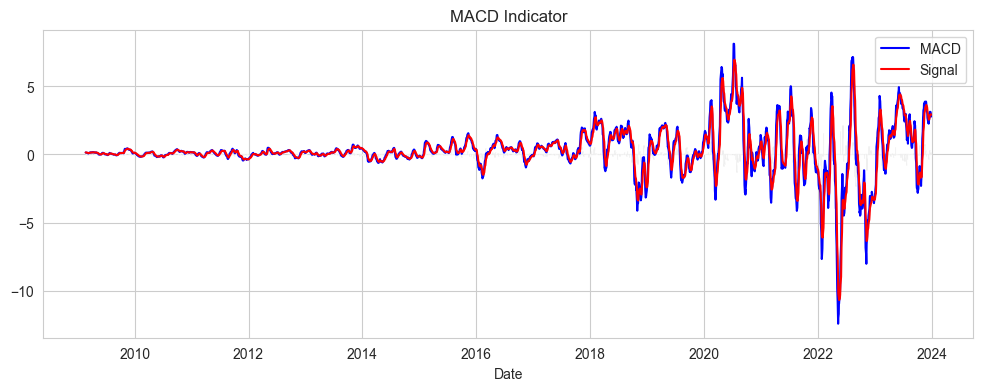

In [22]:
# 7. MACD
macd, macdsignal, macdhist = talib.MACD(
    price_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
price_df['MACD'] = macd
price_df['MACD_signal'] = macdsignal
price_df['MACD_hist'] = macdhist

plt.figure(figsize=(12, 4))
plt.plot(price_df['date'], price_df['MACD'], label='MACD', color='blue')
plt.plot(price_df['date'], price_df['MACD_signal'],
         label='Signal', color='red')
plt.bar(price_df['date'], price_df['MACD_hist'], color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.show()

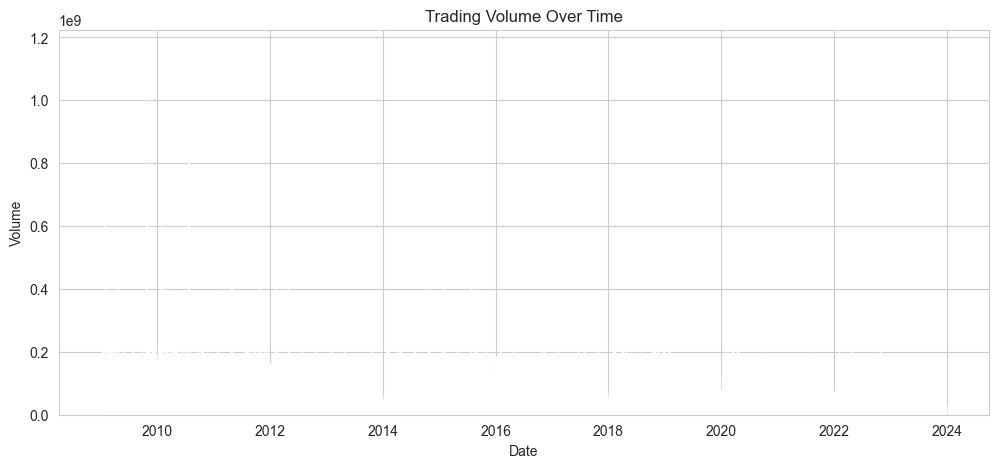

In [23]:
# 8. Volume analysis
plt.figure(figsize=(12, 5))
plt.bar(price_df['date'], price_df['Volume'], color='skyblue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [24]:
# 9. Save processed features
processed_file = PROCESSED_DIR / f"price/{TICKER}_features.csv"
price_df.to_csv(processed_file, index=False)
print(f"Saved processed price features to: {processed_file}")

Saved processed price features to: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\processed\price\AMZN_features.csv
